In [1]:
import json, glob, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from operator import itemgetter
from IPython.display import display, Markdown

In [2]:
def experiment_df(experiments):
    df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['label'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC,
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "POP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    }
    for experiment in experiments ]).sort_values("kappa", ascending=False)
    return df

In [8]:
wd_v1 = experiment_df([ json.load(open(file, 'r')) for file in glob.glob('wd_experiments/*/gpt-4*') ])
wd_v2 = experiment_df([ json.load(open(file, 'r')) for file in glob.glob('wd_experiments_v2/*/gpt-4*') ])
caligraph = experiment_df([ json.load(open(file, 'r')) for file in glob.glob('caligraph_experiments/*/gpt-4*') ])

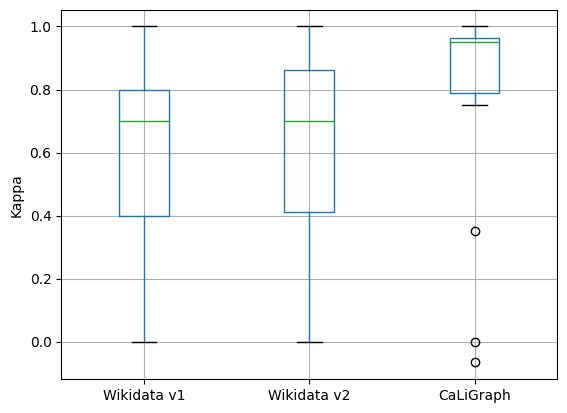

In [9]:
df = pd.concat([wd_v1["kappa"], wd_v2["kappa"], caligraph["kappa"]], axis=1, ignore_index=True)
df.reset_index()
df = df.set_axis(["Wikidata v1", "Wikidata v2", "CaLiGraph"], axis=1)
plot = df.boxplot(return_type='axes')
plot.set_ylabel('Kappa')
plt.show(plot)

In [10]:
df.describe()

,Wikidata v1,Wikidata v2,CaLiGraph
count,17.000000,20.000000,20.000000
mean,0.597059,0.610000,0.791691
std,0.270688,0.331504,0.319859
min,0.000000,0.000000,-0.066176
25%,0.400000,0.412500,0.787500
50%,0.700000,0.700000,0.950000
75%,0.800000,0.862500,0.962500
max,1.000000,1.000000,1.000000


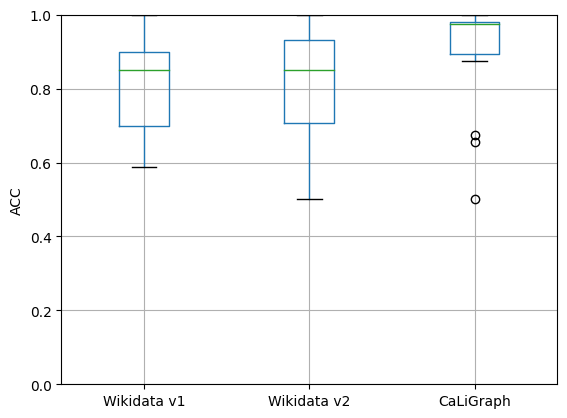

In [11]:
df = pd.concat([wd_v1["ACC"], wd_v2["ACC"], caligraph["ACC"]], axis=1, ignore_index=True)
df.reset_index()
df = df.set_axis(["Wikidata v1", "Wikidata v2", "CaLiGraph"], axis=1)
ax = df.boxplot(return_type='axes')
ax.set_ylabel('ACC')
ax.set_ylim(0.0, 1.0)
plt.show(plot)

In [12]:
df.describe()

,Wikidata v1,Wikidata v2,CaLiGraph
count,17.000000,20.000000,20.000000
mean,0.810092,0.805000,0.905259
std,0.117276,0.165752,0.137293
min,0.588235,0.500000,0.500000
25%,0.700000,0.706250,0.893750
50%,0.850000,0.850000,0.975000
75%,0.900000,0.931250,0.981250
max,1.000000,1.000000,1.000000
